# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.295  1  0.491 0.484 0.003   
                             age        0.127  1  0.212 0.646 0.001   
                             Kiel       2.220  1  3.693 0.056 0.019   
                             Magdeburg  5.199  1  8.648 0.004 0.043   
                             Sweden     8.312  1 13.827 0.000 0.068   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.456  1  0.508 0.477 0.003   
                             age        1.667  1  1.855 0.175 0.010   
                             Kiel       0.005  1  0.006 0.938 0.000   
                             Magdeburg  3.066  1  3.412 0.066 0.018   
                             Sweden    16.454  1 18.311 0.000 0.087   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.315  0.636    False  
                             age               0.190  0.768    False  
                             Kiel              1.251  0.133    False  
                             Magdeburg         2.434  0.015     True  
                             Sweden            3.579  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.321  0.630    False  
                             age               0.757  0.315    False  
                             Kiel              0.028  0.967    False  
                             Magdeburg         1.179  0.151    False  
                             Sweden            4.528  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.898  1  6.775 0.010 0.034   
                             age        0.003  1  0.021 0.885 0.000   
                             Kiel       0.202  1  1.528 0.218 0.008   
                             Magdeburg  0.406  1  3.063 0.082 0.016   
                             Sweden     1.564  1 11.806 0.001 0.058   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.839  1  3.930 0.049 0.020   
                             age        0.944  1  2.018 0.157 0.010   
                             Kiel       2.039  1  4.359 0.038 0.022   
                             Magdeburg  1.442  1  3.083 0.081 0.016   
                             Sweden    12.262  1 26.213 0.000 0.121   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.001  0.028     True  
                             age               0.053  0.930    False  
                             Kiel              0.662  0.345    False  
                             Magdeburg         1.088  0.158    False  
                             Sweden            3.140  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.311  0.105    False  
                             age               0.804  0.267    False  
                             Kiel              1.419  0.086    False  
                             Magdeburg         1.093  0.156    False  
                             Sweden            6.129  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.484         0.315  0.636    False   
                             Kiel      0.056         1.251  0.133    False   
                             Magdeburg 0.004         2.434  0.015     True   
                             Sweden    0.000         3.579  0.002     True   
                             age       0.646         0.190  0.768    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.477         0.321  0.630    False   
                             Kiel      0.938         0.028  0.967    False   
                             Magdeburg 0.066         1.179  0.151    False   
                             Sweden    0.000         4.528  0.000     True   
                             age       0.175         0.757  0.315    False   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.010         2.001  0.028     True  
                             Kiel      0.218         0.662  0.345    False  
                             Magdeburg 0.082         1.088  0.158    False  
                             Sweden    0.001         3.140  0.003     True  
                             age       0.885         0.053  0.930    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.049         1.311  0.105    False  
                             Kiel      0.038         1.419  0.086    False  
                             Magdeburg 0.081         1.093  0.156    False  
                             Sweden    0.000         6.129  0.000     True  
                             age       0.157         0.804  0.267    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.486     0.338     0.234         3.086     0.292
std       0.303         5.348     0.331     0.297         5.814     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.332     0.014     0.001         0.386     0.003
50%       0.121         0.918     0.242     0.071         1.149     0.142
75%       0.465         2.447     0.620     0.411         3.109     0.548
max       1.000       145.325     1.000     1.000        85.665     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_50583/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.484         0.315   
A0A024R0T9;K7ER74;P02655                           AD     0.069         1.163   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.040         1.393   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.531         0.275   
A0A075B6H7                                         AD     0.118         0.927   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.025         1.595   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.916         0.038   
S4R3U6                                             AD     0.477         0.321   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.636    False   
A0A024R0T9;K7ER74;P02655                           AD      0.156    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.103    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.677    False   
A0A075B6H7                                         AD      0.239    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.071    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.954    False   
S4R3U6                                             AD      0.630    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.010         2.001   
A0A024R0T9;K7ER74;P02655                           AD     0.029         1.531   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.411         0.386   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.261         0.584   
A0A075B6H7                                         AD     0.014         1.846   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.177         0.753   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.313         0.504   
S4R3U6                                             AD     0.049         1.311   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.028     True  
A0A024R0T9;K7ER74;P02655                           AD      0.069    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.548    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.395    False  
A0A075B6H7                                         AD      0.038     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.413     0.337     0.248         1.512     0.314
std       0.293         1.677     0.319     0.294         1.756     0.318
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.011         0.360     0.037     0.009         0.360     0.026
50%       0.121         0.916     0.242     0.104         0.983     0.193
75%       0.437         1.942     0.597     0.437         2.050     0.573
max       0.997        25.445     0.998     1.000        18.400     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1025,971


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.484         0.315  0.636   
A0A024R0T9;K7ER74;P02655                           0.069         1.163  0.156   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.040         1.393  0.103   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.531         0.275  0.677   
A0A075B6H7                                         0.118         0.927  0.239   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.025         1.595  0.071   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.916         0.038  0.954   
S4R3U6                                             0.477         0.321  0.630   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.010   
A0A024R0T9;K7ER74;P02655                              False 0.029   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.411   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.261   
A0A075B6H7                                            False 0.014   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.177   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.313   
S4R3U6                                                False 0.049   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.001  0.028   
A0A024R0T9;K7ER74;P02655                                   1.531  0.069   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.386  0.548   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.584  0.395   
A0A075B6H7                                                 1.846  0.038   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.292   
Q9Y6X5                                                     0.753  0.293   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.161   
Q9Y6Y9                                                     0.504  0.454   
S4R3U6                                                     1.311  0.105   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    901
PI (yes) - RF (yes)   326
PI (no)  - RF (yes)   124
PI (yes) - RF (no)     70
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_50583/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                  RF  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.484         0.315  0.636    False 0.010   
A0A075B6H7                   0.118         0.927  0.239    False 0.014   
A0A075B6I0                   0.024         1.623  0.068    False 0.001   
A0A075B6J9                   0.048         1.318  0.118    False 0.019   
A0A075B6R2                   0.472         0.326  0.626    False 0.003   
...                            ...           ...    ...      ...   ...   
Q9UJ14                       0.012         1.938  0.038     True 0.021   
Q9ULZ9                       0.000         3.622  0.001     True 0.033   
Q9UNW1                       0.006         2.207  0.023     True 0.881   
Q9UP79                       0.395         0.403  0.558    False 0.000   
Q9UQ52                       0.048         1.314  0.119    False 0.001   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.001  0.028     True       186  
A0A075B6H7                           1.846  0.038     True        91  
A0A075B6I0                           3.080  0.003     True       194  
A0A075B6J9                           1.715  0.049     True       156  
A0A075B6R2                           2.520  0.010     True       164  
...                                    ...    ...      ...       ...  
Q9UJ14                               1.677  0.052    False       169  
Q9ULZ9                               1.485  0.075    False       171  
Q9UNW1                               0.055  0.928    False       171  
Q9UP79                               3.665  0.001     True       135  
Q9UQ52                               3.165  0.003     True       188  

[194 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.636,0.028,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.156,0.069,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.103,0.548,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.677,0.395,196,PI (no) - RF (no)
A0A075B6H7,0.239,0.038,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.316,0.292,197,PI (no) - RF (no)
Q9Y6X5,0.071,0.293,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.161,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P17302,0.978,0.010,135,PI (no) - RF (yes),0.968
P22692;P22692-2,0.998,0.034,170,PI (no) - RF (yes),0.963
F6VDH7;P50502;Q3KNR6,0.007,0.964,175,PI (yes) - RF (no),0.957
G3V2U7;P07311,0.037,0.992,130,PI (yes) - RF (no),0.955
O94898,0.960,0.013,60,PI (no) - RF (yes),0.947
...,...,...,...,...,...
Q9NX62,0.055,0.047,197,PI (no) - RF (yes),0.008
P00740;P00740-2,0.053,0.045,197,PI (no) - RF (yes),0.008
K7ERG9;P00746,0.052,0.044,197,PI (no) - RF (yes),0.008


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


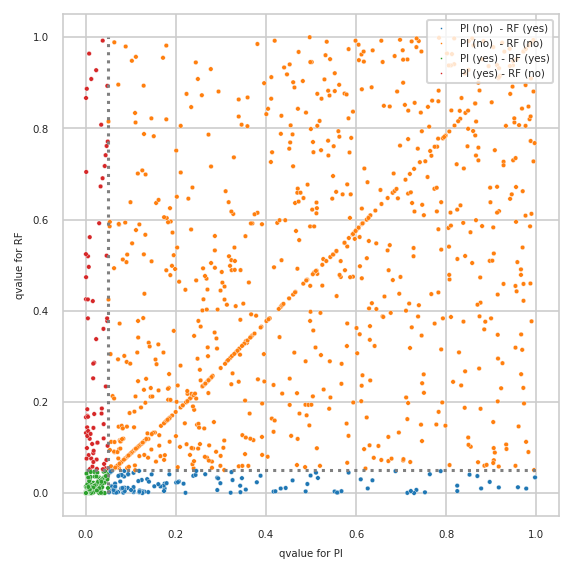

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


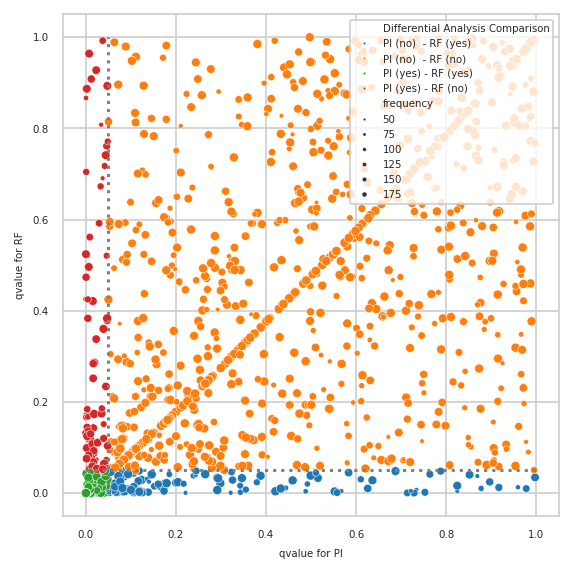

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out